In [0]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.2/julia-1.2.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; precompile"'

   Cloning default registries into `~/.julia`
   Cloning registry from "https://github.com/JuliaRegistries/General.git"
     Added registry `General` to `~/.julia/registries/General`
 Resolving package versions...
 Installed VersionParsing ── v1.2.0
 Installed Parsers ───────── v1.0.2
 Installed Conda ─────────── v1.4.1
 Installed MbedTLS ───────── v0.7.0
 Installed IJulia ────────── v1.21.2
 Installed JSON ──────────── v0.21.0
 Installed ZMQ ───────────── v1.1.0
 Installed BinaryProvider ── v0.5.8
 Installed SoftGlobalScope ─ v1.0.10
  Updating `~/.julia/environments/v1.2/Project.toml`
  [7073ff75] + IJulia v1.21.2
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [b99e7846] + BinaryProvider v0.5.8
  [8f4d0f93] + Conda v1.4.1
  [7073ff75] + IJulia v1.21.2
  [682c06a0] + JSON v0.21.0
  [739be429] + MbedTLS v0.7.0
  [69de0a69] + Parsers v1.0.2
  [b85f4697] + SoftGlobalScope v1.0.10
  [81def892] + VersionParsing v1.2.0
  [c2297ded] + ZMQ v1.1.0
  [2a0f44e3] + Base64 
  [ade2ca70] +

In [0]:
versioninfo()

Julia Version 1.2.0
Commit c6da87ff4b (2019-08-20 00:03 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, broadwell)


 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
  Updating git-repo `https://github.com/JuliaPlots/StatsPlots.jl`
  Updating git-repo `https://github.com/JuliaPlots/StatsPlots.jl`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [f3b207a7]   StatsPlots v0.14.5 #master (https://github.com/JuliaPlots/StatsPlots.jl)
  Updating `~/.julia/environment

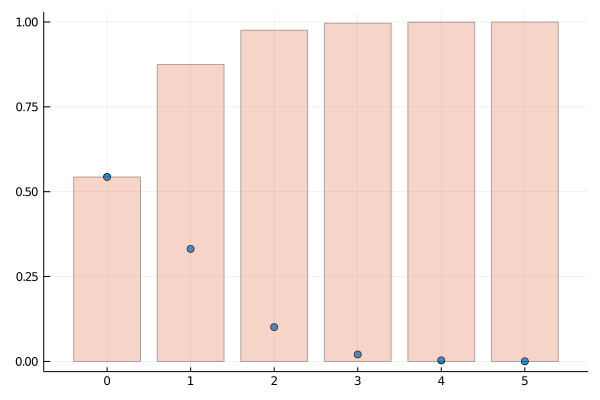

In [0]:
using Pkg
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("HypothesisTests")

#Pkg.add("https://github.com/JuliaPlots/StatsPlots.jl")
Pkg.add(PackageSpec(path="https://github.com/JuliaPlots/StatsPlots.jl"))
Pkg.add("StatsPlots")
Pkg.add("Distances")
Pkg.add("LinearAlgebra")

using Distributions
using Plots
using Distributions
using StatsPlots
using Statistics
using HypothesisTests


# ２項分布の確率密度関数の定義
n=200  # nを十分大きくとる
p=1/100  # pを十分小さくとる
d1= Distributions.Binomial(big(n), big(p))

# ポアソン分布の確率密度関数の定義
l=n*p   # 平均値だけわかればよい
d2=Poisson(l)

pdf.(d1,0:10)   # ２項分布の出力

pdf.(d2,0:10)   # ２項分布の出力

d=Poisson(0.61)
plot(d,fill=(0, .5,:orange))
scatter(d, leg=false)         # 確率密度を散布図にする
bar!(d, func=cdf, alpha=0.3)  # 分布を棒グラフにする

In [0]:
#using Distributions
#using Plots
#using Distributions
using StatsPlots
#using Statistics
using HypothesisTests
using LinearAlgebra
#using Distances

Died=[0, 1, 2, 3, 4, 5, 6]
Days=[55, 144, 140, 95, 45, 15, 9]
mu=sum(Died.*Days/500)
d=Poisson(mu)
E_Days=pdf.(d,0:6)*500
E_Days[7]=(1-sum(pdf.(d,0:5)))*500
E_Days

plot(
    bar(Died, Days, xticks=0:10, xlab="Days"),
    bar(Died, E_Days, xticks=0:10, xlab="E_Days"),
    layout=(1,2),  # 1行2列
    link=:y  # y軸を共有
)

ChisqTest(Days,normalize(E_Days,1))
#ret=ChisqTest(hcat(Days,E_Days))

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.1305498673399876, 0.26579952990421485, 0.2705839214424907, 0.18363628801897036, 0.09347087060165594, 0.03806133850899433, 0.017898184183686158]
    point estimate:          [0.10934393638170974, 0.28628230616302186, 0.2783300198807157, 0.18886679920477137, 0.08946322067594434, 0.02982107355864811, 0.017892644135188866]
    95% confidence interval: Tuple{Float64,Float64}[(0.0656, 0.1556), (0.2425, 0.3325), (0.2346, 0.3245), (0.1451, 0.2351), (0.0457, 0.1357), (0.0, 0.076), (0.0, 0.0641)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7176

Details:
    Sample size:        503
    statistic:          3.6968473774524364
    degrees of freedom: 6
    residuals:          [-1.3162946562978302, 0.8910369404950074, 0.3339765783839597, 0.27374668897878746, -0.2939920772748435, -0.9472